# <center>**Fraudulent_E-Commerce_Transaction_Data**</center>

# **Importing Libraries**

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **Loading Dataset**

In [92]:
chunks = []
for chunk in pd.read_csv(r'S:\Jupyter Notebook\Data Science Internship/Mini Project/Dataset/Fraudulent_E-Commerce_Transaction_Data.csv',
                         chunksize=100000):
    chunks.append(chunk)

df_original = pd.concat(chunks, ignore_index=True)

In [93]:
#df_original = pd.read_csv(r'S:\Jupyter Notebook\Data Science Internship/Mini Project/Dataset/Fraudulent_E-Commerce_Transaction_Data.csv')

In [94]:
from sklearn.utils import resample

# Separate classes
fraud = df_original[df_original['Is Fraudulent'] == 1]
non_fraud = df_original[df_original['Is Fraudulent'] == 0]

# Downsample majority (non-fraud)
non_fraud_sampled = resample(
    non_fraud,
    replace=False,
    n_samples=len(fraud) * 2,   # keep 2x more non-fraud than fraud
    random_state=42
)

# Combine reduced dataset
df_new = pd.concat([fraud, non_fraud_sampled]).sample(frac=1, random_state=42)

print("Original Shape:", df_original.shape)
print("New Shape:", df_new.shape)

Original Shape: (1472952, 16)
New Shape: (221514, 16)


# **Data Exploration**

## **1. First 5 Records:**

In [95]:
#head of the data:
df_new.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
993926,b16121fa-48a3-4954-a941-adc1686eab0d,cd802633-a475-4dcc-b4d5-a6df53039a78,301.11,2024-04-01 12:35:18,credit card,health & beauty,2,39,New Waynehaven,mobile,29.19.13.108,"76719 Barnes Knoll\nNew Feliciamouth, ID 89102","76719 Barnes Knoll\nNew Feliciamouth, ID 89102",0,170,12
589070,e0846545-c504-4308-bc4c-c0b6c1b7e7fb,d4f3bcf1-3810-4e31-9caa-cb6ffc06f4d8,75.90,2024-02-25 18:49:13,bank transfer,toys & games,2,30,Jonesburgh,mobile,48.149.7.154,USS Jackson\nFPO AE 24459,USS Jackson\nFPO AE 24459,0,270,18
788503,e1ebb925-82a0-400c-b7a3-7224e5e27945,a427a44f-01b2-4d82-bc35-bf2710f67530,213.33,2024-01-11 09:58:07,bank transfer,electronics,3,28,Wandaview,mobile,92.67.87.90,USNS Smith\nFPO AE 21546,USNS Smith\nFPO AE 21546,0,147,9
137867,353ec6d6-85d2-4d8b-bad5-6425c5efe5fc,59050f96-4e2d-425d-bd7f-6827807e19ba,31.99,2024-02-07 18:24:13,credit card,electronics,4,39,Meganshire,desktop,188.24.213.73,"24739 Linda Island\nKimberlyshire, CO 46350","24739 Linda Island\nKimberlyshire, CO 46350",0,85,18
991019,55457ed1-2345-491a-bcfe-5afefd45be61,9ab9e65f-afa8-4374-ae09-b868d88f2bca,58.91,2024-01-04 13:56:10,PayPal,clothing,3,12,West Kyleburgh,desktop,98.65.223.220,"6870 Connie Dale\nPort Williamborough, NV 16231","6870 Connie Dale\nPort Williamborough, NV 16231",0,47,13


## **2. Last 5 Records:**

In [96]:
#tail of the data:
df_new.tail()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
680730,679b3f56-330c-438e-a7d5-f3e8d280bc1c,e520eaac-b4bf-443e-8138-833b1c9fa7f9,86.29,2024-01-12 10:15:03,bank transfer,toys & games,1,38,Port James,mobile,10.151.115.179,"02951 Hudson Pass\nLake Heatherfurt, CA 48160","02951 Hudson Pass\nLake Heatherfurt, CA 48160",0,107,10
469921,f5980304-717f-4a7b-a353-148be5f611e6,72f51757-2bba-4c4a-9e58-4e79a0ac70ee,233.44,2024-02-23 20:27:43,credit card,electronics,4,33,Amybury,desktop,35.77.81.24,"7564 Victor Parks\nSmithberg, FM 86149","7564 Victor Parks\nSmithberg, FM 86149",0,226,20
1059288,724f7b22-7cb2-43a7-99d3-1f2b901e70a6,6f68bfe1-1c43-49af-b0df-b5804c170cff,158.70,2024-02-27 07:07:15,PayPal,health & beauty,5,40,West Patriciaside,mobile,21.204.205.216,"86086 Holder Summit Apt. 374\nWest Davidton, T...","59857 Lindsay Plains\nSouth Stephaniehaven, SC...",0,152,7
387551,754bc4fb-1ae7-4e79-9199-02ca92527ec5,a10ba642-a713-484a-b9bf-943ecb59a882,48.95,2024-01-01 00:09:31,debit card,home & garden,5,33,Lake Jessestad,tablet,71.175.144.61,"82505 Moran Mill Suite 181\nWangburgh, KS 63726","82505 Moran Mill Suite 181\nWangburgh, KS 63726",0,157,0
773926,37892ef6-9dd1-4bcf-8c22-724fd63f245a,edf91b74-5273-40e1-a350-bfd1bb228362,449.06,2024-03-09 10:12:04,credit card,toys & games,2,45,West Dan,mobile,129.128.239.39,"8693 Griffin Row\nCarpentertown, RI 33849","8693 Griffin Row\nCarpentertown, RI 33849",0,303,10


# **Understanding Variables**

## **1. Overview of Dataset Variables**

## **i) Column Names**

In [97]:
#Column names:
print('Colums Names:')
print(df_new.columns)

Colums Names:
Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')


## **ii) Overview of Column Data Types**

In [98]:
#Datatypes:
print('Data Types:')
print(df_new.dtypes)

Data Types:
Transaction ID         object
Customer ID            object
Transaction Amount    float64
Transaction Date       object
Payment Method         object
Product Category       object
Quantity                int64
Customer Age            int64
Customer Location      object
Device Used            object
IP Address             object
Shipping Address       object
Billing Address        object
Is Fraudulent           int64
Account Age Days        int64
Transaction Hour        int64
dtype: object


## **2. Statistical Summary of Numerical Variables**

In [99]:
#Describing the data:
df_new.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,221514.000000,221514.000000,221514.000000,221514.000000,221514.000000,221514.000000
mean,322.829932,2.999305,34.481392,0.333333,160.632655,10.270335
std,499.429293,1.416701,10.012063,0.471406,113.447444,7.158676
min,10.000000,1.000000,-12.000000,0.000000,1.000000,0.000000
25%,77.070000,2.000000,28.000000,0.000000,49.000000,4.000000
50%,173.650000,3.000000,34.000000,0.000000,155.000000,10.000000
75%,359.550000,4.000000,41.000000,1.000000,260.000000,17.000000
max,12701.750000,5.000000,80.000000,1.000000,365.000000,23.000000


## **3. Checking**

## **i) Information Summary:**

In [100]:
#Information Summary:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221514 entries, 993926 to 773926
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      221514 non-null  object 
 1   Customer ID         221514 non-null  object 
 2   Transaction Amount  221514 non-null  float64
 3   Transaction Date    221514 non-null  object 
 4   Payment Method      221514 non-null  object 
 5   Product Category    221514 non-null  object 
 6   Quantity            221514 non-null  int64  
 7   Customer Age        221514 non-null  int64  
 8   Customer Location   221514 non-null  object 
 9   Device Used         221514 non-null  object 
 10  IP Address          221514 non-null  object 
 11  Shipping Address    221514 non-null  object 
 12  Billing Address     221514 non-null  object 
 13  Is Fraudulent       221514 non-null  int64  
 14  Account Age Days    221514 non-null  int64  
 15  Transaction Hour    221514 non-nul

## **ii) Shape of the Data:**

In [101]:
#Shape of the Data
df_new.shape

(221514, 16)

# **Data Wrangling**

## **1. Checking missing/null values**

In [102]:
#Count of Missing Entries:
x = df_new.isnull().sum()
print(x)

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


## **2. Checking duplicated Values**

In [103]:
duplicate_count = df_new.duplicated().sum()
duplicate_count

np.int64(0)

# **Data Preprocessing**

## **1. Dropping Irrelevant Columns from the Dataset**

In [104]:
# Removing columns that are not needed for analysis or model training
df = df_new.drop(['Transaction ID', 'Customer ID', 'IP Address', 'Shipping Address', 'Billing Address', 'Account Age Days'], axis=1)

# Displaying the first 5 rows of the cleaned dataset
df.head()

,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Transaction Hour
993926,301.11,2024-04-01 12:35:18,credit card,health & beauty,2,39,New Waynehaven,mobile,0,12
589070,75.90,2024-02-25 18:49:13,bank transfer,toys & games,2,30,Jonesburgh,mobile,0,18
788503,213.33,2024-01-11 09:58:07,bank transfer,electronics,3,28,Wandaview,mobile,0,9
137867,31.99,2024-02-07 18:24:13,credit card,electronics,4,39,Meganshire,desktop,0,18
991019,58.91,2024-01-04 13:56:10,PayPal,clothing,3,12,West Kyleburgh,desktop,0,13


## **2. Checking Dataset Shape and Remaining Columns**

In [105]:
# Printing the shape of the dataset 
print("Shape after dropping columns:", df.shape)

#list of remaining columns after dropping unwanted columns
print("Columns remaining:", df.columns.tolist())

Shape after dropping columns: (221514, 10)
Columns remaining: ['Transaction Amount', 'Transaction Date', 'Payment Method', 'Product Category', 'Quantity', 'Customer Age', 'Customer Location', 'Device Used', 'Is Fraudulent', 'Transaction Hour']


# **Exploratory Data Analysis**

## **1. Pie Chart: Fraud vs Non-Fraud Transaction Distribution** 

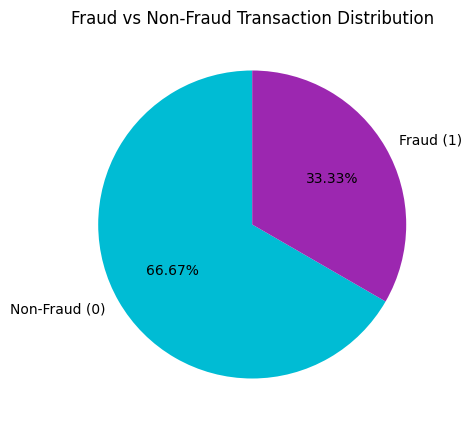

In [106]:
# Count fraud and non-fraud values
fraud_counts = df['Is Fraudulent'].value_counts()

# Labels for the pie chart
labels = ['Non-Fraud (0)', 'Fraud (1)']

plt.figure(figsize=(5,5))
plt.pie(fraud_counts, labels=labels, autopct='%1.2f%%', startangle=90, colors = ['#00BCD4','#9C27B0'])
plt.title("Fraud vs Non-Fraud Transaction Distribution")
plt.show()

## **2. Line plot for number of frauds in each product category**

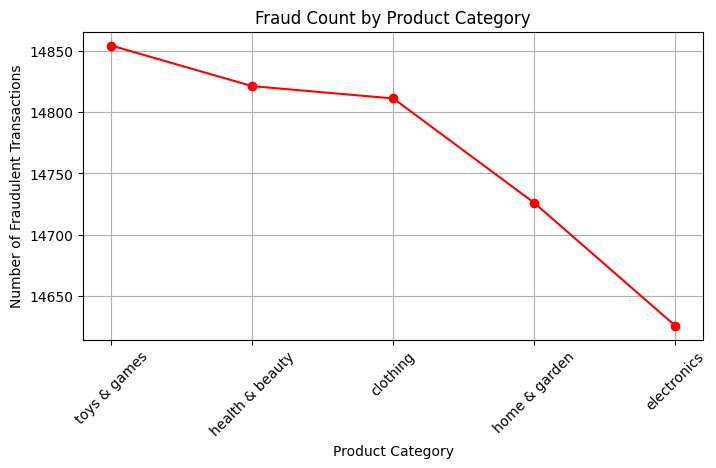

In [107]:
# Aggregate fraud count per product category
fraud_counts = df[df['Is Fraudulent']==1].groupby('Product Category').size()

# Sort categories for better visualization
fraud_counts = fraud_counts.sort_values(ascending=False)

# Line plot
plt.figure(figsize=(8,4))
plt.plot(fraud_counts.index, fraud_counts.values, marker='o', color='red')
plt.title('Fraud Count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## **3. Violin Plot – Customer Age Distribution by Fraud Status**

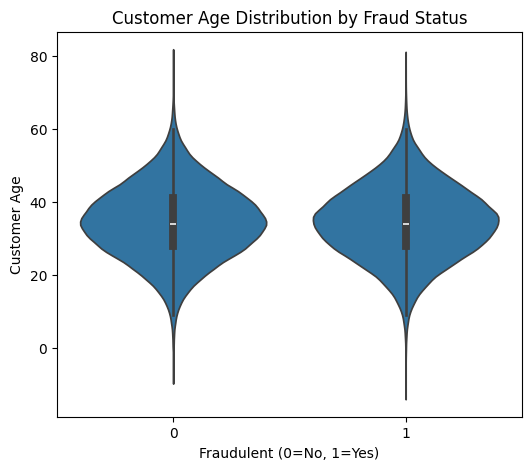

In [108]:
plt.figure(figsize=(6,5))
sns.violinplot(x='Is Fraudulent', y='Customer Age', data=df)
plt.title('Customer Age Distribution by Fraud Status')
plt.xlabel('Fraudulent (0=No, 1=Yes)')
plt.ylabel('Customer Age')
plt.show()

## **4. Count Plot – Customer Age Group vs Fraud Status**

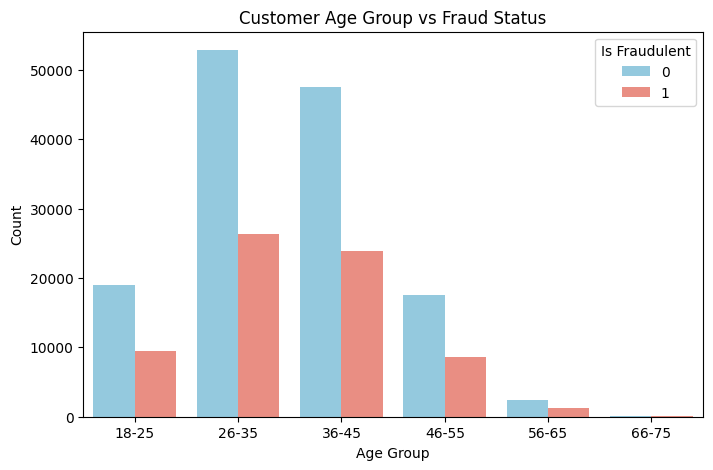

In [109]:
# Create age bins
df['AgeGroup'] = pd.cut(df['Customer Age'], bins=[18,25,35,45,55,65,75], labels=['18-25','26-35','36-45','46-55','56-65','66-75'])

# Plot count of customers per age group by fraud status
plt.figure(figsize=(8,5))
sns.countplot(x='AgeGroup', hue='Is Fraudulent', data=df, palette=['skyblue','salmon'])
plt.title('Customer Age Group vs Fraud Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# **Data Preparation**

## **Converting 'Transaction Date' Column and Extracting Date Features**

In [110]:
# Convert 'Transaction Date' column into datetime format and extract useful date features (if the column exists)
if 'Transaction Date' in df.columns:
    
    # Convert column to datetime; invalid values become NaT
    df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
    
    # Replace NaT values with a default date to avoid missing datetime issues
    df['Transaction Date'] = df['Transaction Date'].fillna(pd.Timestamp('2000-01-01'))

    # Create new datetime-based features for analysis/modeling
    df['Transaction_Year'] = df['Transaction Date'].dt.year
    df['Transaction_Month'] = df['Transaction Date'].dt.month
    df['Transaction_Day'] = df['Transaction Date'].dt.day
    df['Transaction_DOW'] = df['Transaction Date'].dt.dayofweek  # Day of week (0=Mon)

    # Remove the original text date column
    df.drop(columns=['Transaction Date'], inplace=True)

else:
    print("Column 'Transaction Date' already dropped.")

# Display first few rows of the updated dataframe
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Transaction Hour,AgeGroup,Transaction_Year,Transaction_Month,Transaction_Day,Transaction_DOW
993926,301.11,credit card,health & beauty,2,39,New Waynehaven,mobile,0,12,36-45,2024,4,1,0
589070,75.90,bank transfer,toys & games,2,30,Jonesburgh,mobile,0,18,26-35,2024,2,25,6
788503,213.33,bank transfer,electronics,3,28,Wandaview,mobile,0,9,26-35,2024,1,11,3
137867,31.99,credit card,electronics,4,39,Meganshire,desktop,0,18,36-45,2024,2,7,2
991019,58.91,PayPal,clothing,3,12,West Kyleburgh,desktop,0,13,NaN,2024,1,4,3


## **Encoding Categorical Variables**

In [111]:
# Make a copy of the dataframe to preserve the original
df_encoded = df.copy()

# Step 1: Label Encoding for High-Cardinality Columns
# High-cardinality columns have many unique values (like locations or product categories)
high_card_cols = ['Customer Location', 'Product Category', 'Device Used']

for col in high_card_cols:
    le = LabelEncoder()  # create a new label encoder for each column
    df_encoded[col] = df_encoded[col].astype(str)  # convert to string to handle NaNs safely
    df_encoded[col] = le.fit_transform(df_encoded[col])  # transform text labels into integers

# Step 2: One-Hot Encoding for Low-Cardinality Columns
# Low-cardinality columns have few unique values, suitable for one-hot encoding
low_card_cols = ['Payment Method']
df_encoded = pd.get_dummies(df_encoded, columns=low_card_cols, drop_first=True)  # avoid dummy variable trap

# Display first few rows of the encoded dataframe
df_encoded.head()

,Transaction Amount,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Transaction Hour,AgeGroup,Transaction_Year,Transaction_Month,Transaction_Day,Transaction_DOW,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card
993926,301.11,2,2,39,29985,1,0,12,36-45,2024,4,1,0,False,True,False
589070,75.90,4,2,30,15887,1,0,18,26-35,2024,2,25,6,True,False,False
788503,213.33,1,3,28,50518,1,0,9,26-35,2024,1,11,3,True,False,False
137867,31.99,1,4,39,24069,0,0,18,36-45,2024,2,7,2,False,True,False
991019,58.91,0,3,12,53641,0,0,13,NaN,2024,1,4,3,False,False,False


## **Separating Features and Target Variable**

In [112]:
# Features (X): all columns except the target variable
X = df_encoded.drop('Is Fraudulent', axis=1)

# Target (y): the column we want to predict
y = df_encoded['Is Fraudulent']

# Display first few rows of the features
X.head()

,Transaction Amount,Product Category,Quantity,Customer Age,Customer Location,Device Used,Transaction Hour,AgeGroup,Transaction_Year,Transaction_Month,Transaction_Day,Transaction_DOW,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card
993926,301.11,2,2,39,29985,1,12,36-45,2024,4,1,0,False,True,False
589070,75.90,4,2,30,15887,1,18,26-35,2024,2,25,6,True,False,False
788503,213.33,1,3,28,50518,1,9,26-35,2024,1,11,3,True,False,False
137867,31.99,1,4,39,24069,0,18,36-45,2024,2,7,2,False,True,False
991019,58.91,0,3,12,53641,0,13,NaN,2024,1,4,3,False,False,False


## **Displaying Feature Column Names**

In [113]:
# Show all feature column names after encoding and scaling
print("Feature columns:", X.columns.tolist())

Feature columns: ['Transaction Amount', 'Product Category', 'Quantity', 'Customer Age', 'Customer Location', 'Device Used', 'Transaction Hour', 'AgeGroup', 'Transaction_Year', 'Transaction_Month', 'Transaction_Day', 'Transaction_DOW', 'Payment Method_bank transfer', 'Payment Method_credit card', 'Payment Method_debit card']


## **Splitting Dataset into Training and Test Sets**

In [114]:
#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Complete Preprocessing: Scaling, Boolean Conversion, and Categorical Encoding**

## **Scaling Numeric Columns**

In [115]:
# Identify numeric columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

# Create copies of train and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale numeric columns (mean=0, std=1)
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Display first few rows to verify scaling
X_train_scaled.head()

,Transaction Amount,Product Category,Quantity,Customer Age,Customer Location,Device Used,Transaction Hour,AgeGroup,Transaction_Year,Transaction_Month,Transaction_Day,Transaction_DOW,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card
176959,4.165628,-1.414489,0.705490,-0.745829,0.312792,1.221786,1.498518,26-35,2024,1,7,6,False,False,True
691335,0.390832,0.708988,1.411075,2.149958,-0.272470,-0.004512,0.520652,56-65,2024,3,9,5,False,True,False
1074303,-0.271379,-1.414489,-0.705681,-0.346410,-1.533379,-1.230810,-0.736604,26-35,2024,1,13,5,True,False,False
770362,-0.472572,0.708988,1.411075,0.452428,-1.261614,-1.230810,1.219128,36-45,2024,2,21,2,False,False,True
1250129,-0.288341,0.708988,1.411075,1.650684,0.054815,-1.230810,0.660347,46-55,2024,1,3,2,False,True,False


## **Converting Boolean Columns to Integers**

In [116]:
# Identify boolean columns
bool_cols = X_train_scaled.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers (0 = False, 1 = True)
X_train_scaled[bool_cols] = X_train_scaled[bool_cols].astype(int)
X_test_scaled[bool_cols] = X_test_scaled[bool_cols].astype(int)

# Display first few rows to verify conversion
X_train_scaled.head()

,Transaction Amount,Product Category,Quantity,Customer Age,Customer Location,Device Used,Transaction Hour,AgeGroup,Transaction_Year,Transaction_Month,Transaction_Day,Transaction_DOW,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card
176959,4.165628,-1.414489,0.705490,-0.745829,0.312792,1.221786,1.498518,26-35,2024,1,7,6,0,0,1
691335,0.390832,0.708988,1.411075,2.149958,-0.272470,-0.004512,0.520652,56-65,2024,3,9,5,0,1,0
1074303,-0.271379,-1.414489,-0.705681,-0.346410,-1.533379,-1.230810,-0.736604,26-35,2024,1,13,5,1,0,0
770362,-0.472572,0.708988,1.411075,0.452428,-1.261614,-1.230810,1.219128,36-45,2024,2,21,2,0,0,1
1250129,-0.288341,0.708988,1.411075,1.650684,0.054815,-1.230810,0.660347,46-55,2024,1,3,2,0,1,0


## **Encoding Categorical Columns**

In [117]:
# Identify remaining categorical columns
cat_cols = X_train_scaled.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding
for col in cat_cols:
    le = LabelEncoder()
    # Fit on training data
    X_train_scaled[col] = le.fit_transform(X_train_scaled[col])
    # Transform test data using the same encoder
    X_test_scaled[col] = le.transform(X_test_scaled[col])

# Display first few rows to verify encoding
X_train_scaled.head()

,Transaction Amount,Product Category,Quantity,Customer Age,Customer Location,Device Used,Transaction Hour,AgeGroup,Transaction_Year,Transaction_Month,Transaction_Day,Transaction_DOW,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card
176959,4.165628,-1.414489,0.705490,-0.745829,0.312792,1.221786,1.498518,1,2024,1,7,6,0,0,1
691335,0.390832,0.708988,1.411075,2.149958,-0.272470,-0.004512,0.520652,4,2024,3,9,5,0,1,0
1074303,-0.271379,-1.414489,-0.705681,-0.346410,-1.533379,-1.230810,-0.736604,1,2024,1,13,5,1,0,0
770362,-0.472572,0.708988,1.411075,0.452428,-1.261614,-1.230810,1.219128,2,2024,2,21,2,0,0,1
1250129,-0.288341,0.708988,1.411075,1.650684,0.054815,-1.230810,0.660347,3,2024,1,3,2,0,1,0


## **Label Encoding Remaining Categorical Columns**

In [118]:
# Identify categorical columns in the training set
cat_cols = X_train_scaled.select_dtypes(include=['object', 'category']).columns

# Convert categorical columns to numeric using Label Encoding
for col in cat_cols:
    le = LabelEncoder()
    # Fit encoder on training data
    X_train_scaled[col] = le.fit_transform(X_train_scaled[col])
    # Transform test data using the same encoder to maintain consistency
    X_test_scaled[col] = le.transform(X_test_scaled[col])

## **Converting Booleans and Encoding Categorical Columns in Original Datasets**

In [119]:
# Step 1: Convert boolean columns to integers (0 = False, 1 = True)
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

# Step 2: Encode categorical columns using Label Encoding
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    le = LabelEncoder()
    # Fit encoder on training set
    X_train[col] = le.fit_transform(X_train[col])
    # Transform test set using the same encoder
    X_test[col] = le.transform(X_test[col])

## **Verifying Data Types After Encoding and Scaling**

In [120]:
print("=== Scaled Training Set Data Types ===")
print(X_train_scaled.dtypes)

print("\n=== Scaled Test Set Data Types ===")
print(X_test_scaled.dtypes)

print("\n=== Original (Unscaled) Training Set Data Types ===")
print(X_train.dtypes)

print("\n=== Original (Unscaled) Test Set Data Types ===")
print(X_test.dtypes)

=== Scaled Training Set Data Types ===
Transaction Amount              float64
Product Category                float64
Quantity                        float64
Customer Age                    float64
Customer Location               float64
Device Used                     float64
Transaction Hour                float64
AgeGroup                          int64
Transaction_Year                  int32
Transaction_Month                 int32
Transaction_Day                   int32
Transaction_DOW                   int32
Payment Method_bank transfer      int64
Payment Method_credit card        int64
Payment Method_debit card         int64
dtype: object

=== Scaled Test Set Data Types ===
Transaction Amount              float64
Product Category                float64
Quantity                        float64
Customer Age                    float64
Customer Location               float64
Device Used                     float64
Transaction Hour                float64
AgeGroup                       

# **Implement Three Machine Learning Algorithms** 

## **1. Training Logistic Regression Model**

In [121]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
# max_iter=500 ensures the solver converges during training
log_model = LogisticRegression(max_iter=500)

# Train the model on the scaled training dataset
log_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test dataset
y_pred_log = log_model.predict(X_test_scaled)

## **2. Training Decision Tree Classifier**

In [122]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
# random_state=42 ensures reproducible results
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the original training dataset
# Note: scaling is not required for tree-based models
dt_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_dt = dt_model.predict(X_test)

## **3. Training XGBoost Classifier**

In [123]:
from xgboost import XGBClassifier

# Initialize XGBoost model with tuned hyperparameters
model = XGBClassifier(
    n_estimators=400,        # Number of trees
    learning_rate=0.05,      # Step size shrinkage
    max_depth=6,             # Maximum tree depth
    subsample=0.8,           # Fraction of samples for each tree
    colsample_bytree=0.8,    # Fraction of features for each tree
    random_state=42          # Ensure reproducibility
)

# Train the model on the original training dataset
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# **Use Evaluation Metrics to Compare All Three Models** 

In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **1. Evaluating Logistic Regression Model** 

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the Logistic Regression model on the test set
print("\n📌 Logistic Regression Performance:")

# Accuracy: overall fraction of correct predictions
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# Confusion Matrix: shows TP, TN, FP, FN counts
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Classification Report: precision, recall, f1-score for each class
print("Classification Report:\n", classification_report(y_test, y_pred_log))


📌 Logistic Regression Performance:
Accuracy: 0.7274902376814211
Confusion Matrix:
 [[27658  1877]
 [10196  4572]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.94      0.82     29535
           1       0.71      0.31      0.43     14768

    accuracy                           0.73     44303
   macro avg       0.72      0.62      0.63     44303
weighted avg       0.72      0.73      0.69     44303



## **2. Evaluating Decision Tree Model**

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the Decision Tree model on the test set
print("\n📌 Decision Tree Performance:")

# Make predictions on the test set (already done, but can be repeated for clarity)
y_pred_dt = dt_model.predict(X_test)

# Accuracy: overall fraction of correct predictions
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Confusion Matrix: shows counts of TP, TN, FP, FN
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Classification Report: precision, recall, f1-score for each class
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


📌 Decision Tree Performance:
Accuracy: 0.6330271087736722
Confusion Matrix:
 [[21035  8500]
 [ 7758  7010]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72     29535
           1       0.45      0.47      0.46     14768

    accuracy                           0.63     44303
   macro avg       0.59      0.59      0.59     44303
weighted avg       0.64      0.63      0.64     44303



## **3. Evaluating XGBoost Model**

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the XGBoost model on the test set
print("\n📌 XGBoost Performance:")

# Make predictions on the test set
y_pred_xgb = model.predict(X_test)

# Accuracy: overall fraction of correct predictions
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Confusion Matrix: shows counts of TP, TN, FP, FN
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Classification Report: precision, recall, f1-score for each class
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


📌 XGBoost Performance:
Accuracy: 0.7310565875900052
Confusion Matrix:
 [[27493  2042]
 [ 9873  4895]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.93      0.82     29535
           1       0.71      0.33      0.45     14768

    accuracy                           0.73     44303
   macro avg       0.72      0.63      0.64     44303
weighted avg       0.73      0.73      0.70     44303



## **Making Predictions on a New Transaction Using XGBoost**

In [128]:
# Ensure the new transaction matches the order and number of columns in X_train_scaled
new_transaction = np.array([[5000, 1, 0, 3, 2, 1, 400, 0, 22, 1, 2, 0, 5, 1, 1]])

# Predict the class (0 = Not Fraud, 1 = Fraud)
prediction = model.predict(new_transaction)

# Predict probability of being fraudulent
probability = model.predict_proba(new_transaction)[0][1]

print("Predicted Class:", int(prediction[0]))
print("Fraud Probability:", round(probability, 4))

Predicted Class: 1
Fraud Probability: 0.9949


## **Inspecting Min and Max Values of Features**

In [129]:
X_train_scaled.describe().T[['min', 'max']]

,min,max
Transaction Amount,-0.626585,24.788805
Product Category,-1.414489,1.416814
Quantity,-1.411266,1.411075
Customer Age,-4.640163,4.546471
Customer Location,-1.669019,1.748582
Device Used,-1.230810,1.221786
Transaction Hour,-1.435080,1.777908
AgeGroup,0.000000,6.000000
Transaction_Year,2024.000000,2024.000000
Transaction_Month,1.000000,4.000000


In [130]:
import joblib

# Save the trained model
joblib.dump(model, 'trained_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
